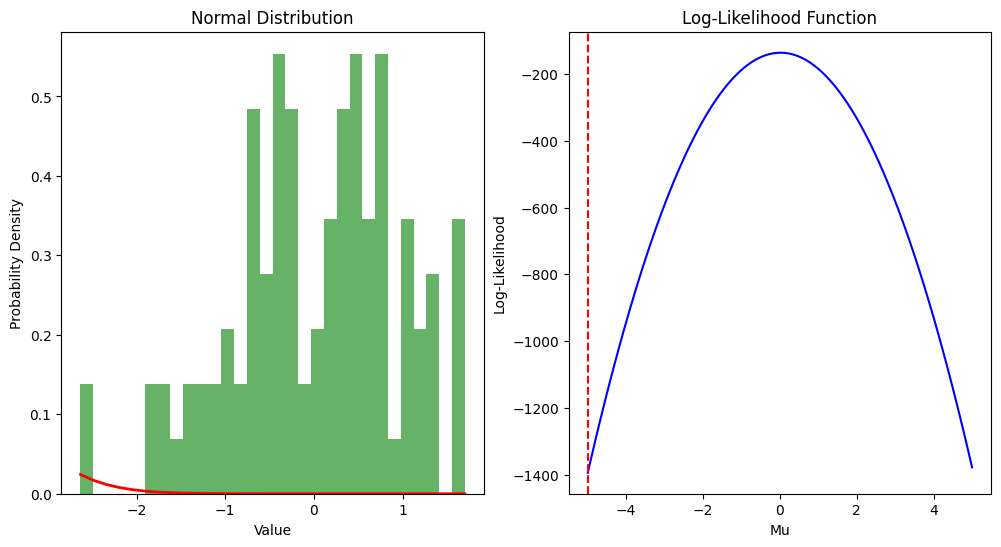

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Number of points
n_points = 100

# Generate points from a normal distribution with a fixed standard deviation
sigma = 1
points = np.random.normal(0, sigma, n_points)  # Initial points with mu = 0

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for the distribution
count, bins, ignored = ax1.hist(points, 30, density=True, alpha=0.6, color='g')

# Range of mu values for the animation
mu_values = np.linspace(-5, 5, 100)

# Function to update the plot
def update(frame):
    mu = mu_values[frame]

    # Update distribution plot
    ax1.clear()
    ax1.hist(points, 30, density=True, alpha=0.6, color='g')
    ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2)),
             linewidth=2, color='r')
    ax1.set_title('Normal Distribution')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Probability Density')

    # Update likelihood plot
    ax2.clear()
    likelihoods = np.array([np.sum(-np.log(np.sqrt(2 * np.pi * sigma**2)) - ((points - m)**2 / (2 * sigma**2))) for m in mu_values])
    ax2.plot(mu_values, likelihoods, color='b')
    ax2.axvline(x=mu, color='r', linestyle='--')
    ax2.set_title('Log-Likelihood Function')
    ax2.set_xlabel('Mu')
    ax2.set_ylabel('Log-Likelihood')

# Creating the animation
ani = animation.FuncAnimation(fig, update, frames=len(mu_values), repeat=True)

# Display the animation
HTML(ani.to_html5_video())


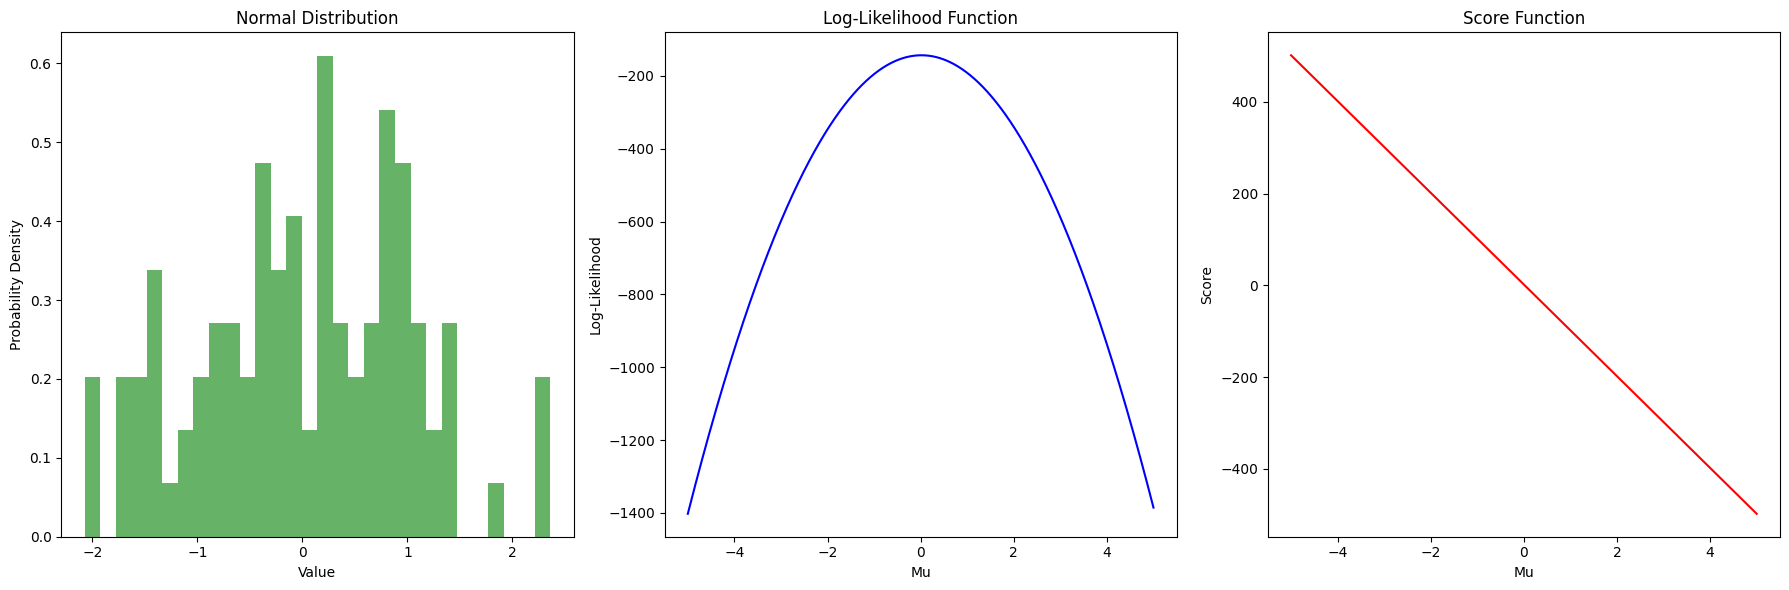

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points and fixed standard deviation
n_points = 100
sigma = 1

# Generate points from a normal distribution
points = np.random.normal(0, sigma, n_points)

# Range of mu values for plotting
mu_values = np.linspace(-5, 5, 1000)

# Normal Distribution Plot
plt.figure(figsize=(18, 6))

# 1. Normal Distribution
plt.subplot(1, 3, 1)
plt.hist(points, bins=30, density=True, alpha=0.6, color='g')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')

# 2. Log-Likelihood Function
log_likelihoods = [np.sum(-np.log(np.sqrt(2 * np.pi * sigma**2)) - ((points - mu)**2 / (2 * sigma**2))) for mu in mu_values]
plt.subplot(1, 3, 2)
plt.plot(mu_values, log_likelihoods, color='b')
plt.title('Log-Likelihood Function')
plt.xlabel('Mu')
plt.ylabel('Log-Likelihood')

# 3. Score Function
scores = [np.sum((points - mu) / sigma**2) for mu in mu_values]
plt.subplot(1, 3, 3)
plt.plot(mu_values, scores, color='r')
plt.title('Score Function')
plt.xlabel('Mu')
plt.ylabel('Score')

plt.tight_layout()
plt.show()
